In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers

In [3]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-10-06 04:31:21--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-10-06 04:31:21 (88.6 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [4]:
from helper_functions import *

In [5]:
import tensorflow_datasets as tfds

In [6]:
datasets=tfds.list_builders()

In [8]:
len(datasets)

1314

In [13]:
(train_data,test_data),ds_info=tfds.load('cifar100',shuffle_files=True,as_supervised=True,with_info=True,split=['train','test'])

In [14]:
ds_info.features

FeaturesDict({
    'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=100),
})

In [17]:
class_names=ds_info.features['label'].names

In [18]:
class_names[:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [32]:
train_one_sample=train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [33]:
for image, label in train_one_sample:
  print(f'''
  Image Shape: {image.shape},
  Image Dtype: {image.dtype},
  Target class from cifar100 : {label},
  Classname (str form) : {class_names[label.numpy()]}
  ''')


  Image Shape: (32, 32, 3),
  Image Dtype: <dtype: 'uint8'>,
  Target class from cifar100 : 66,
  Classname (str form) : raccoon
  


In [21]:
image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[151, 154, 145],
        [144, 147, 135],
        [141, 143, 134],
        ...,
        [ 44,  38,  39],
        [112, 100,  96],
        [145, 127, 120]],

       [[153, 156, 150],
        [141, 144, 135],
        [139, 142, 136],
        ...,
        [ 68,  59,  59],
        [131, 113, 106],
        [121, 101,  94]],

       [[163, 165, 161],
        [150, 153, 145],
        [147, 149, 144],
        ...,
        [ 75,  66,  60],
        [101,  86,  77],
        [ 83,  77,  73]],

       ...,

       [[150, 150, 162],
        [ 51,  52,  67],
        [ 46,  42,  56],
        ...,
        [ 60,  59,  48],
        [ 71,  73,  56],
        [ 58,  62,  44]],

       [[146, 158, 168],
        [ 92, 106, 116],
        [ 73,  77,  85],
        ...,
        [ 54,  55,  40],
        [ 59,  66,  41],
        [ 52,  56,  28]],

       [[ 92,  95, 105],
        [ 86,  90, 100],
        [ 77,  74,  82],
        ...,
        [ 59,  61,  44]

In [22]:
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=1>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=241>)

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

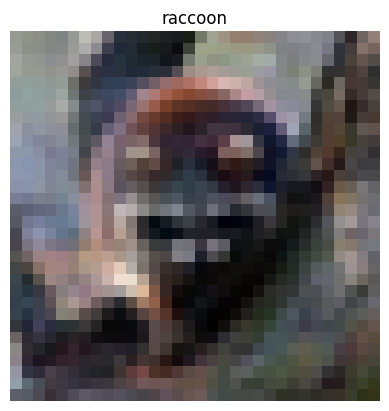

In [34]:
# Plot image now
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [35]:
# Creating a preprocessing function now
def preprocess_img(image,label,img_shape=32):
    image=tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(image,tf.float32),label

In [36]:
preprocessed_image=preprocess_img(image=image,label=label,img_shape=32)[0]
print(f'image before preprocessing {image[:2]}....\n  , Image Shape : {image.shape} \n Data Type : {image.dtype}')
print(f'image after preprocessing {preprocessed_image[:2]}....\n  , Image Shape : {preprocessed_image.shape} \n Data Type : {preprocessed_image.dtype}')

image before preprocessing [[[151 154 145]
  [144 147 135]
  [141 143 134]
  [131 135 130]
  [126 132 129]
  [149 153 146]
  [189 189 182]
  [170 165 163]
  [102  99 106]
  [ 41  48  61]
  [ 39  45  53]
  [ 36  41  43]
  [ 36  39  35]
  [ 29  31  32]
  [ 25  27  28]
  [ 26  29  20]
  [117 122 104]
  [160 163 146]
  [158 146 132]
  [147 126 111]
  [146 126 112]
  [145 131 121]
  [136 129 126]
  [133 133 135]
  [142 143 148]
  [144 144 151]
  [136 136 145]
  [130 130 139]
  [ 83  83  88]
  [ 44  38  39]
  [112 100  96]
  [145 127 120]]

 [[153 156 150]
  [141 144 135]
  [139 142 136]
  [133 135 134]
  [134 135 135]
  [155 156 153]
  [172 173 171]
  [141 138 145]
  [ 62  63  78]
  [ 32  41  57]
  [ 35  43  53]
  [ 24  31  34]
  [ 23  29  24]
  [ 23  25  28]
  [ 12  12  15]
  [ 63  66  54]
  [157 163 138]
  [157 163 136]
  [154 159 134]
  [154 154 130]
  [156 153 130]
  [153 153 136]
  [142 147 137]
  [127 129 132]
  [128 128 134]
  [132 132 140]
  [138 138 149]
  [118 120 132]
  [ 48  51 

In [38]:
train_data=train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
test_data=test_data.map(map_func=preprocess_img).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [40]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [41]:
# Create a Model Checkpoint
check_point_path='model_checkpoints/v1_checkpoint.weights.h5'
model_check_point=tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,monitor='val_loss',
                                                     save_best_only=True,save_weights_only=True)

In [43]:
# setting up mixed precesion
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [44]:
# Craeating a Feature Extarction model
image_shape=(32,32,3)
base_model=tf.keras.applications.EfficientNetV2S(include_top=False)
base_model.trainable=False

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [46]:
# Create a functional model now
inputs=layers.Input(shape=image_shape,name='Input_Layer')
x=base_model(inputs,training=False)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation('softmax',dtype=tf.float32,name='softmax_float32')(x)
model=tf.keras.Model(inputs,outputs)

In [56]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-s (Functional)   │ (None, 1, 1, 1280)     │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       128,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 100)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,459,460 (78.05 MB)

 Trainable params: 128,100 (500.39 KB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [59]:
history_feature_extract_model=model.fit(

                                  train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=int(0.15 * len(test_data)),
                                  callbacks=[model_check_point])

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.2944 - loss: 2.9354 - val_accuracy: 0.3220 - val_loss: 2.8245
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.3006 - loss: 2.8868 - val_accuracy: 0.3105 - val_loss: 2.8116
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3105 - loss: 2.8513 - val_accuracy: 0.3152 - val_loss: 2.7860
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3138 - loss: 2.8264 - val_accuracy: 0.3084 - val_loss: 2.7614
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3185 - loss: 2.7996 - val_accuracy: 0.3254 - val_loss: 2.7404


In [60]:
res_feature_extartion=model.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.3218 - loss: 2.7534


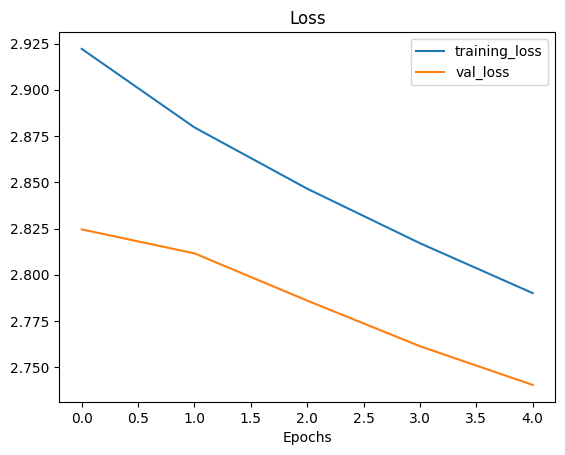

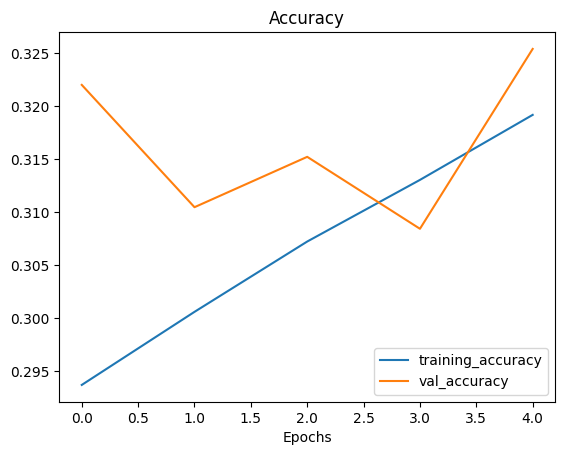

In [61]:
plot_loss_curves(history_feature_extract_model)

# **Lets now Fine Tune so accuracy increases**

In [62]:
base_model.trainable=True

for layer in model.layers[1].layers[:-20]:
    layer.trainable=False

In [63]:
for layer_no , layer in enumerate(base_model.layers):
    print(layer_no,layer.name,layer.trainable)

0 input_layer False
1 rescaling False
2 stem_conv False
3 stem_bn False
4 stem_activation False
5 block1a_project_conv False
6 block1a_project_bn False
7 block1a_project_activation False
8 block1a_add False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block2d_expand_conv False
34 block2d_expand_bn False
35 block2d_expand_activation False
36 block2d_project_conv False
37 

In [68]:
# Add a custom classification head

x=base_model.output
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(224,activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.5)(x)

x=layers.Dense(112,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.4)(x)

outputs=layers.Dense(len(class_names),activation='softmax',name='output_layer')(x)
model=tf.keras.Model(inputs=base_model.input,outputs=outputs)

In [69]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [71]:
check_point_path="model_checkpoints/v2_finetuned_checkpoint.weights.h5"
model_check_point=tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,monitor='val_loss',save_best_only=True,
                                                     save_weights_only=True,)

In [72]:
total_epochs=10

history_fine_tuned=model.fit(train_data,validation_data=test_data,epochs=total_epochs,initial_epoch=history_feature_extract_model.epoch[-1],
                             steps_per_epoch=len(train_data),validation_steps=int(0.15*len(test_data)),callbacks=[model_check_point])

Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 68ms/step - accuracy: 0.0598 - loss: 4.4835 - val_accuracy: 0.2480 - val_loss: 2.9593
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1883 - loss: 3.3391 - val_accuracy: 0.3098 - val_loss: 2.7351
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2284 - loss: 3.1123 - val_accuracy: 0.3145 - val_loss: 2.6352
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2550 - loss: 2.9924 - val_accuracy: 0.3499 - val_loss: 2.5728
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2729 - loss: 2.9063 - val_accuracy: 0.3499 - val_loss: 2.5168
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2905 - loss: 2.8423 - val_accuracy: 0.3533 - val_loss: 2.4932


Lets Try again

In [73]:
# Add a custom classification head

x=base_model.output
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(1024,activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.5)(x)

x=layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.4)(x)

outputs=layers.Dense(len(class_names),activation='softmax',name='output_layer')(x)
model=tf.keras.Model(inputs=base_model.input,outputs=outputs)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

check_point_path="model_checkpoints/v3_finetuned_checkpoint.weights.h5"
model_check_point=tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,monitor='val_loss',save_best_only=True,
                                                     save_weights_only=True,)
total_epochs=10

history_fine_tuned_v3=model.fit(train_data,validation_data=test_data,epochs=total_epochs,
                             steps_per_epoch=len(train_data),validation_steps=int(0.15*len(test_data)),callbacks=[model_check_point])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 70ms/step - accuracy: 0.1952 - loss: 3.7083 - val_accuracy: 0.3356 - val_loss: 2.5794
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.2980 - loss: 2.8113 - val_accuracy: 0.3628 - val_loss: 2.4593
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3247 - loss: 2.6523 - val_accuracy: 0.3716 - val_loss: 2.4198
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3457 - loss: 2.5531 - val_accuracy: 0.3838 - val_loss: 2.3736
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3591 - loss: 2.4754 - val_accuracy: 0.3798 - val_loss: 2.3545
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3792 - loss: 2.3869 - val_accuracy: 0.3872 - val_loss: 2.3348
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3945 - loss: 2.3224 - val_accuracy: 0.4035 - val_loss: 2.2953
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4074 

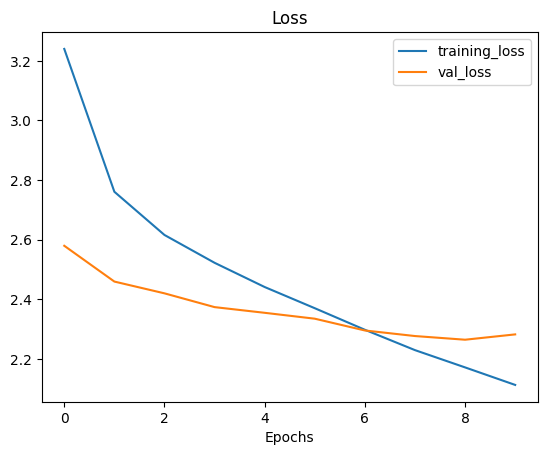

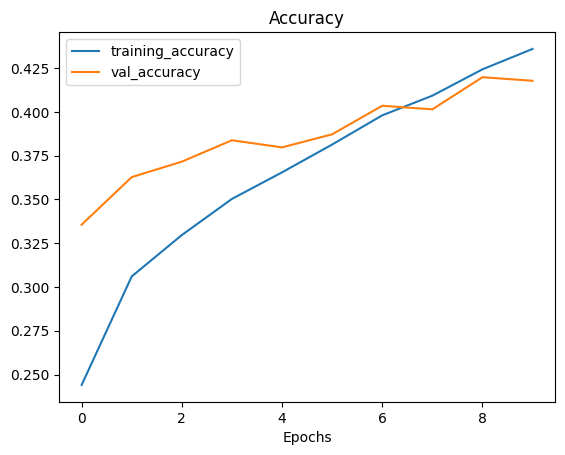

In [74]:
plot_loss_curves(history_fine_tuned_v3)

In [76]:
base_model.trainable=True

for layer in base_model.layers[:-50]:
    layer.trainable=False

# Add a custom classification head

x=base_model.output
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(1024,activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.5)(x)


x=layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.4)(x)

x=layers.Dense(212,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dropout(0.2)(x)

outputs=layers.Dense(len(class_names),activation='softmax',name='output_layer')(x)
model=tf.keras.Model(inputs=base_model.input,outputs=outputs)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

check_point_path="model_checkpoints/v4_finetuned_checkpoint.weights.h5"
model_check_point=tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,monitor='val_loss',save_best_only=True,
                                                     save_weights_only=True,)
total_epochs=10

history_fine_tuned_v4=model.fit(train_data,validation_data=test_data,epochs=total_epochs,
                             steps_per_epoch=len(train_data),validation_steps=int(0.15*len(test_data)),callbacks=[model_check_point])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 72ms/step - accuracy: 0.1906 - loss: 3.5666 - val_accuracy: 0.3750 - val_loss: 2.4819
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.3355 - loss: 2.5952 - val_accuracy: 0.3852 - val_loss: 2.4110
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3657 - loss: 2.4509 - val_accuracy: 0.3879 - val_loss: 2.3938
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3859 - loss: 2.3676 - val_accuracy: 0.4015 - val_loss: 2.3532
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3976 - loss: 2.2875 - val_accuracy: 0.3988 - val_loss: 2.3360
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4157 - loss: 2.2190 - val_accuracy: 0.3967 - val_loss: 2.3742
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4301 - loss: 2.1634 - val_accuracy: 0.3988 - val_loss: 2.3678
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4415 